<a href="https://colab.research.google.com/github/RakeshBabuMacharla/PDS-Assignment-3/blob/main/Pds_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('diabetes.csv')

# 1a) Random Sample Mean and Max Glucose Comparison

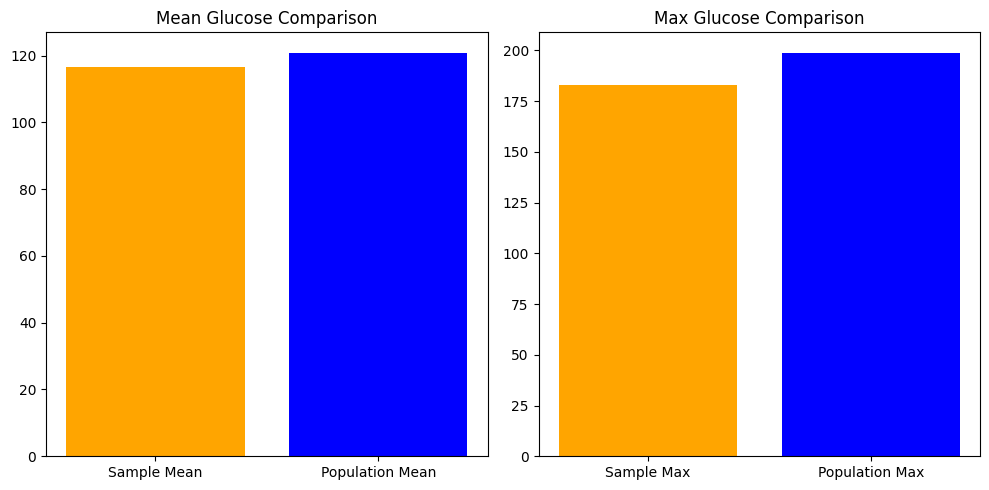

In [2]:
# Set seed for reproducibility
np.random.seed(42)

sample = df.sample(n=25, random_state=42)
sample_glucose_mean = sample['Glucose'].mean()
sample_glucose_max = sample['Glucose'].max()

population_glucose_mean = df['Glucose'].mean()
population_glucose_max = df['Glucose'].max()

# Plot mean and max comparison
plt.figure(figsize=(10, 5))

# Mean comparison
plt.subplot(1, 2, 1)
plt.bar(['Sample Mean', 'Population Mean'], [sample_glucose_mean, population_glucose_mean], color=['orange', 'blue'])
plt.title('Mean Glucose Comparison')

# Max comparison
plt.subplot(1, 2, 2)
plt.bar(['Sample Max', 'Population Max'], [sample_glucose_max, population_glucose_max], color=['orange', 'blue'])
plt.title('Max Glucose Comparison')

plt.tight_layout()
plt.show()

# 1b) 98th Percentile of BMI Comparison

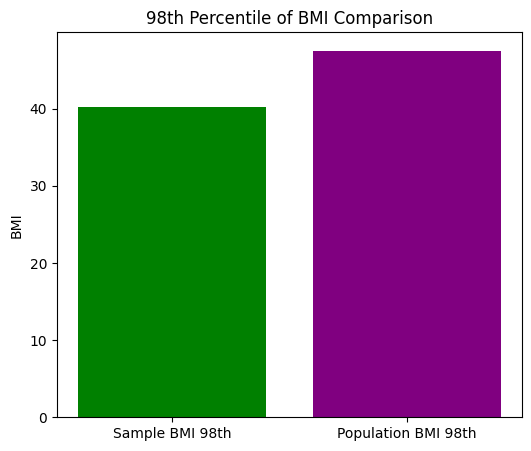

In [3]:
sample_bmi_98 = np.percentile(sample['BMI'], 98)
population_bmi_98 = np.percentile(df['BMI'], 98)

# Plot BMI percentile comparison
plt.figure(figsize=(6, 5))
plt.bar(['Sample BMI 98th', 'Population BMI 98th'], [sample_bmi_98, population_bmi_98], color=['green', 'purple'])
plt.title('98th Percentile of BMI Comparison')
plt.ylabel('BMI')
plt.show()

# 1c) Bootstrap Analysis for BloodPressure

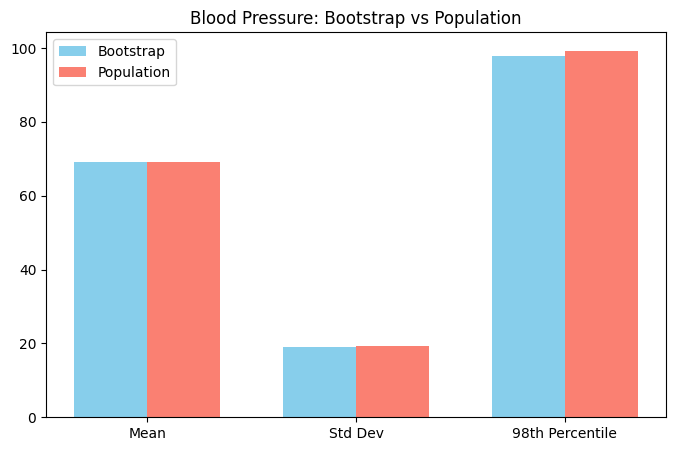

In [4]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp = boot_sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

# Bootstrap results
boot_mean_avg = np.mean(bootstrap_means)
boot_std_avg = np.mean(bootstrap_stds)
boot_percentile_avg = np.mean(bootstrap_percentiles)

# Population statistics
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_98 = np.percentile(df['BloodPressure'], 98)

# Compare bootstrap and population
stats_labels = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_values = [boot_mean_avg, boot_std_avg, boot_percentile_avg]
population_values = [pop_bp_mean, pop_bp_std, pop_bp_98]

x = np.arange(len(stats_labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bootstrap_values, width, label='Bootstrap', color='skyblue')
plt.bar(x + width/2, population_values, width, label='Population', color='salmon')
plt.xticks(x, stats_labels)
plt.title('Blood Pressure: Bootstrap vs Population')
plt.legend()
plt.show()

# 1c) Report Summary

In [5]:
print("---- Report Summary ----")
print(f"Population BloodPressure Mean: {pop_bp_mean:.2f}")
print(f"Bootstrap Average Mean: {boot_mean_avg:.2f}")
print()
print(f"Population BloodPressure Std Dev: {pop_bp_std:.2f}")
print(f"Bootstrap Average Std Dev: {boot_std_avg:.2f}")
print()
print(f"Population BloodPressure 98th Percentile: {pop_bp_98:.2f}")
print(f"Bootstrap Average 98th Percentile: {boot_percentile_avg:.2f}")

---- Report Summary ----
Population BloodPressure Mean: 69.11
Bootstrap Average Mean: 69.18

Population BloodPressure Std Dev: 19.36
Bootstrap Average Std Dev: 19.07

Population BloodPressure 98th Percentile: 99.32
Bootstrap Average 98th Percentile: 97.90
